In [18]:
import gammapy 
print(f'loaded gammapy version: {gammapy.__version__} ' )
print(f'Supposed to be 1.0 (21-11-2022)' )

loaded gammapy version: 1.1.dev320+g92a6eb9f4 
Supposed to be 1.0 (21-11-2022)


In [19]:
#get_ipython().system('jupyter nbconvert --to script 1-Nui_Par_Fitting.ipynb')
import pyximport

pyximport.install()
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import gammapy

# from gammapy.datasets import MapDataset
from gammapy.maps import Map
from astropy.coordinates import SkyCoord, Angle
from gammapy.modeling import Fit,  Parameters, Covariance , Parameter
from gammapy.datasets import MapDataset ,Datasets#, MapDatasetNuisance
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    create_crab_spectral_model,
    SkyModel,
    PointSpatialModel,
    ShellSpatialModel,
    GeneralizedGaussianSpatialModel,
    TemplateSpatialModel,
    LogParabolaSpectralModel,
    GaussianSpatialModel,
    DiskSpatialModel,
    PowerLawNormSpectralModel,
    Models,
    SpatialModel,
    FoVBackgroundModel,
    PowerLawNuisanceSpectralModel,
    PowerLawNormNuisanceSpectralModel
)
from gammapy.estimators import TSMapEstimator, ExcessMapEstimator

from regions import CircleSkyRegion, RectangleSkyRegion
import yaml
import sys

from Dataset_Creation import sys_dataset


## Read dataset

spatial binsize =  [0.08] deg
penality 0 []
MapDataset
----------

  Name                            : xaCQC6YD 

  Total counts                    : 388209 
  Total background counts         : 360331.31
  Total excess counts             : 27877.69

  Predicted counts                : 361333.07
  Predicted background counts     : 360331.34
  Predicted excess counts         : 1001.73

  Exposure min                    : 2.07e-01 m2 s
  Exposure max                    : 2.41e+11 m2 s

  Number of total bins            : 540000 
  Number of fit bins              : 180191 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : -924522.99

  Number of models                : 2 
  Number of parameters            : 11
  Number of free parameters       : 7

  Component 0: SkyModel
  
    Name                      : Source
    Datasets names            : None
    Spectral model type       : PowerLawSpectralModel
    Spatial  model type       : GaussianSpatialModel
    Tem

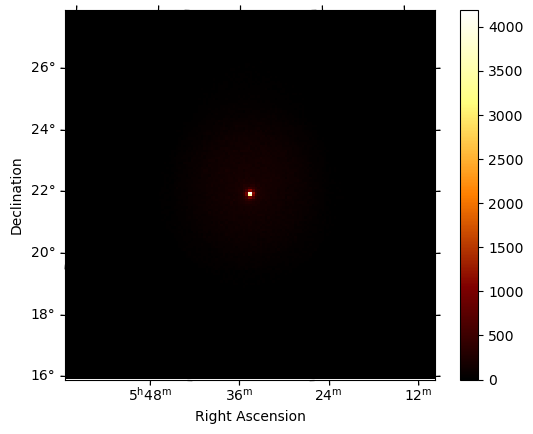

In [20]:
source = 'Crab'
path = '/home/vault/caph/mppi062h/repositories/HESS_3Dbkg_syserror/2-error_in_dataset'
path_crab = '/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/nuisance_summary/Crab'


dataset_load = MapDataset.read(f'{path}/{source}/stacked.fits')
dataset_load = dataset_load.downsample(4)
models = Models.read(f"{path_crab}/standard_model.yml")
model_spectrum  = PowerLawSpectralModel(
    index=2.3,
    amplitude="1e-12 TeV-1 cm-2 s-1",    )
source_model = SkyModel(spatial_model = models['main source'].spatial_model ,
                       spectral_model = model_spectrum,
                       name = "Source")    
models = Models(source_model)

bkg_model = FoVBackgroundModel(dataset_name=dataset_load.name)
bkg_model.parameters['tilt'].frozen  = False
models.append(bkg_model)
dataset_load.models = models

dataset_asimov = dataset_load.copy()
dataset_asimov.counts = dataset_load.npred()
models = Models(source_model.copy())
bkg_model = FoVBackgroundModel(dataset_name=dataset_asimov.name)
bkg_model.parameters['tilt'].frozen  = False
models.append(bkg_model)
dataset_asimov.models = models

    
dataset_load.counts.sum_over_axes().plot(add_cbar=1)
binsize = dataset_load.geoms["geom"].width[1] / dataset_load.geoms["geom"].data_shape[1]
print(
    "spatial binsize = ",
    binsize
)

print(dataset_load)

## Single Cases

In [21]:
factors = np.array([0.10])
sigma  =0.1
rnd = False
sys = sys_dataset(dataset_asimov, factors[0], rnd)
dataset_input = sys.create_dataset()


In [22]:

for i, factor in enumerate(factors):
    print(i, factor)
    sys = sys_dataset(dataset_asimov, factor, rnd)
    dataset = sys.create_dataset()
    datasets = Datasets(dataset)
    
    dataset_N = sys.create_dataset_N(sigma)
    #penalising_covmatrix = [[sigma,sigma * 0.99], [sigma * 0.99, sigma]]
    #penalising_invcovmatrix = np.linalg.inv(penalising_covmatrix)
    
    sigma_a = 0.1
    sigma_n = 0.1
    sigma_na = 0.001

    penalising_covmatrix = [[1/sigma_a**2 + 1/sigma_na ** 2,  - 1/sigma_na**2],
                            [  - 1/sigma_na**2             ,    1/sigma_n**2 + 1/sigma_na ** 2]]

    penalising_invcovmatrix =  penalising_covmatrix

    dataset_N.penalising_invcovmatrix = penalising_invcovmatrix
    datasets_N = Datasets(dataset_N)

0 0.1
4
4


In [23]:
%%time
for i, factor in enumerate(factors):
    print(i, factor)
    fit = Fit(store_trace=False)
    result = fit.run(datasets)


0 0.1
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []
penality 0 []


In [24]:
print(result)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 303
	total stat : -753580.09

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



In [25]:
%%time
for i, factor in enumerate(factors):
    fit_N = Fit(store_trace=False)
    result_N = fit_N.run(datasets_N)


penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 118276.76748238072 [0.3438967 0.       ]
penality 118276.76748238072 [-0.3438967  0.       ]
penality 1182.7676748238075 [0.03438967 0.        ]
penality 1182.7676748238075 [-0.03438967  0.        ]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 0.0 [0. 0.]
penality 118276.76748238072 [0.        0.3438967]
penality 118276.76748238072 [ 0.        -0.3438967]
penality 1182.7676748238075 [0.         0.03438967]
penality 1182.7676748238075 [ 0.         -0.03438967]
penality 11.82767

penality 2.833211733440235 [0.02045128 0.01879114]
penality 2.833211733440235 [0.02045128 0.01879114]
penality 2.833211733440235 [0.02045128 0.01879114]
penality 2.833211733440235 [0.02045128 0.01879114]
penality 2.833211733440235 [0.02045128 0.01879114]
penality 2.833211733440235 [0.02045128 0.01879114]
penality 2.833211733440235 [0.02045128 0.01879114]
penality 2.833211733440235 [0.02045128 0.01879114]
penality 1.7556713659789358 [0.02045128 0.01915623]
penality 4.177367576530521 [0.02045128 0.01842604]
penality 2.833211733440235 [0.02045128 0.01879114]
penality 2.833211733440235 [0.02045128 0.01879114]
penality 0.8267594011743286 [0.01936146 0.02022654]
penality 0.20663101295910502 [0.01958008 0.0199386 ]
penality 0.20663101295910502 [0.01958008 0.0199386 ]
penality 0.20663101295910502 [0.01958008 0.0199386 ]
penality 0.20663101295910502 [0.01958008 0.0199386 ]
penality 0.20663101295910502 [0.01958008 0.0199386 ]
penality 0.08403071969870769 [0.02000387 0.0199386 ]
penality 0.688470

penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.25240617192188003 [0.01981646 0.01939752]
penality 0.25736176265376065 [0.01896886 0.01939752]
penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.2137100810099017 [0.01939266 0.01976285]
penality 0.20376962119202716 [0.01939266 0.01903219]
penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.07525754168914964 [0.01939266 0.01939752]
penality 0.0752964080392192 [0.01940269 0.01940345]
penality 0.07527610258373733 [0.0193985  0.01940

penality 5.2508955854925805e-06 [0.00016193 0.000162  ]
penality 5.2508955854925805e-06 [0.00016193 0.000162  ]
penality 5.2508955854925805e-06 [0.00016193 0.000162  ]
penality 5.2508955854925805e-06 [0.00016193 0.000162  ]
penality 5.2508955854925805e-06 [0.00016193 0.000162  ]
penality 5.2508955854925805e-06 [0.00016193 0.000162  ]
penality 0.1327315707884522 [0.00016193 0.00052622]
penality 0.1326134356439938 [ 0.00016193 -0.00020222]
penality 5.2508955854925805e-06 [0.00016193 0.000162  ]
penality 5.2508955854925805e-06 [0.00016193 0.000162  ]
penality 0.003880517561683255 [-0.00440457 -0.00440494]
penality 0.0005331959758894052 [-0.00163271 -0.00163282]
penality 8.79690623571442e-05 [-0.0006632  -0.00066321]
penality 1.1772267406323284e-05 [-0.00024262 -0.00024259]
penality 2.728241451910368e-06 [-0.00011678 -0.00011675]
penality 2.728241451910368e-06 [-0.00011678 -0.00011675]
penality 2.728241451910368e-06 [-0.00011678 -0.00011675]
penality 2.728241451910368e-06 [-0.00011678 -0.0

penality 0.13217644324155864 [-0.00069115 -0.00032767]
penality 9.554184301451777e-05 [-0.00069115 -0.00069117]
penality 0.13217644324155864 [-0.00069115 -0.00032767]
penality 9.554184301451777e-05 [-0.00069115 -0.00069117]
unique_pars ['index', 'amplitude', 'amplitude_nuisance', 'reference', 'lon_0', 'lat_0', 'sigma', 'e', 'phi', 'norm', 'norm_nuisance', 'tilt', 'reference']
parameters ['index', 'amplitude', 'amplitude_nuisance', 'reference', 'lon_0', 'lat_0', 'sigma', 'e', 'phi', 'norm', 'norm_nuisance', 'tilt', 'reference']
DatasetModels

Component 0: SkyModel

  Name                      : SourceN
  Datasets names            : None
  Spectral model type       : PowerLawNuisanceSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.299   +/-    0.00             
    amplitude                     :   1.11e-12   +/- 0.0e+00 1 / (cm2 s TeV)
    amplitude_nuisance            :     -0.001   

In [26]:
print(result_N)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 679
	total stat : -753580.09

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



## Correlation

In [27]:
from gammapy.modeling.fit import Registry
registry= Registry()

def covariance_ (fit_compute, datasets_compute):
    #parameters = Parameters.from_stack([datasets_compute.models.parameters])
    parameters = datasets_compute.models.parameters
    parameters = parameters.free_parameters

    kwargs = fit_compute.covariance_opts.copy()
    kwargs["minuit"] = fit_compute.minuit
    backend = kwargs.pop("backend", fit_compute.backend)
    compute = registry.get("covariance", backend)

    with parameters.restore_status():
        if fit_compute.backend == "minuit":
            method = "hesse"
        else:
            method = ""
        factor_matrix, info = compute(
            parameters=parameters, function=datasets_compute.stat_sum, **kwargs
        )
        covariance = Covariance.from_factor_matrix(
            parameters=parameters, matrix=factor_matrix
        )

        #covariance = covariance.get_subcovariance(datasets_compute.models.parameters)
    return covariance

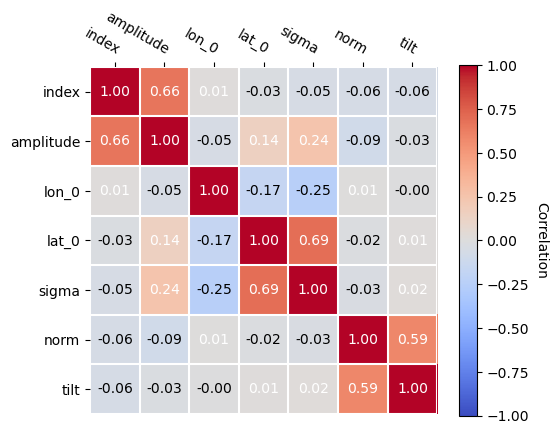

In [28]:
covariance  = covariance_(fit, dataset)
covariance.plot_correlation()


fig = plt.gcf()
fig.savefig("plots/3_corr_matrix.png")

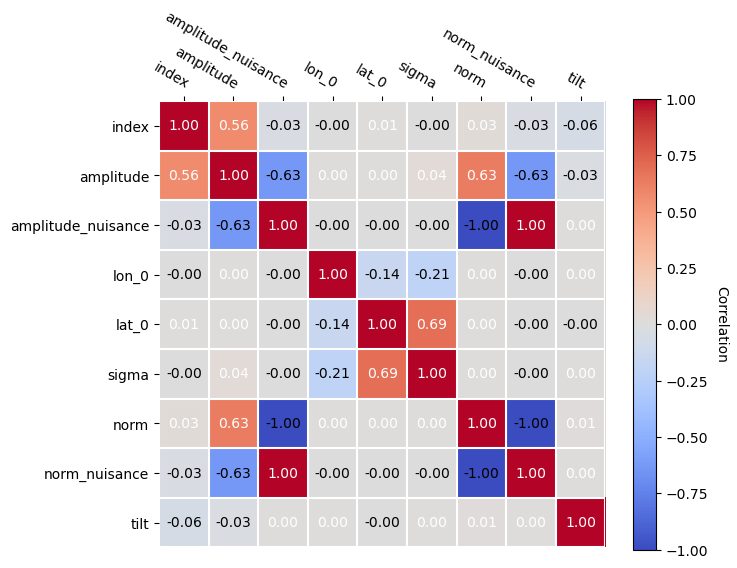

In [29]:
covariance_N  = covariance_(fit_N, dataset_N)
covariance_N.plot_correlation()


fig = plt.gcf()
fig.savefig("plots/3_corr_matrix.png")

In [30]:
print(dataset_N.models)

DatasetModels

Component 0: SkyModel

  Name                      : SourceN
  Datasets names            : None
  Spectral model type       : PowerLawNuisanceSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.299   +/-    0.06             
    amplitude                     :   1.11e-12   +/- 1.3e-13 1 / (cm2 s TeV)
    amplitude_nuisance            :     -0.001   +/-    0.07             
    reference             (frozen):      1.000       TeV         
    lon_0                         :     83.631   +/-    0.00 deg         
    lat_0                         :     22.018   +/-    0.00 deg         
    sigma                         :      0.020   +/-    0.02 deg         
    e                     (frozen):      0.000                   
    phi                   (frozen):      0.000       deg         

Component 1: FoVBackgroundModel

  Name                      : dataset N-bkg
  Datasets

In [31]:
def gaussian_penality(penalised_parameters, penalising_invcovmatrix):
    return np.matmul(
        np.matmul(penalising_invcovmatrix, penalised_parameters.value),
        penalised_parameters.value,
    )

In [32]:
def copmute_penalty(sigma_n, sigma_a, sigma_na, N ):
    penalising_covmatrix = [[1/sigma_a**2 + 1/sigma_na ** 2,  - 1/sigma_na**2],
                        [  - 1/sigma_na**2             ,    1/sigma_n**2 + 1/sigma_na ** 2]]
    dataset_N.penalising_invcovmatrix = penalising_covmatrix
    pen = np.zeros((N,N))
    stat = np.zeros((N,N))
    values = np.linspace(-0.1, 0.1, N)
    for i,v in enumerate(values):
        dataset_N.models.parameters['norm_nuisance'].value = v
        for j, v in enumerate(values):
            dataset_N.models.parameters['amplitude_nuisance'].value = v
            pen[i,j] = gaussian_penality(dataset_N.models.parameters.penalised_parameters,
                                         dataset_N.penalising_invcovmatrix)
            stat[i,j] = dataset_N.stat_sum()
    return pen

def plot_penalty(pen):
    
    fig, ax = plt.subplots(1,1)
    #ax = fig.add_subplot(111)
    cax = ax.matshow(pen)  # interpolation='nearest')
    fig.colorbar(cax);
    N = len(pen[0])
    values = np.linspace(-0.1, 0.1, N)
    values_plot = np.linspace(-0.1, 0.1, int(11))
    print(N)
    plt.ylabel("amplitude_nuisance N_0")
    plt.yticks(np.linspace(0, N-1, 11), [ f'{i:.1}' for i in values_plot]) 

    plt.xlabel("norm_nuisance N_1",)
    plt.xticks(np.linspace(0, N-1, 11), [ f'{i:.1}' for i in values_plot], rotation=90) 
    plt.title(f"Gaussian Penalty $\sigma_N$={sigma_na}")

    CS = plt.contour(np.linspace(0, N-1, N), np.linspace(0, N-1, N),
                     pen, colors=('crimson',),
                     levels = [ 0.5,1])

    plt.clabel(CS, fmt = '%1.1f', colors = 'crimson', fontsize=12)
    return fig


In [33]:
sigma_a = 0.1
sigma_n = 0.1
sigma_na = 0.01
N = 66
pen = copmute_penalty(sigma_n, sigma_a, sigma_na, N )

penality 2.0000000000000004 [-0.1 -0.1]
penality 2.034082840236686 [-0.09692308 -0.1       ]
penality 2.2594082840236682 [-0.09384615 -0.1       ]
penality 2.6759763313609466 [-0.09076923 -0.1       ]
penality 3.283786982248521 [-0.08769231 -0.1       ]
penality 4.082840236686391 [-0.08461538 -0.1       ]
penality 5.073136094674554 [-0.08153846 -0.1       ]
penality 6.254674556213014 [-0.07846154 -0.1       ]
penality 7.6274556213017775 [-0.07538462 -0.1       ]
penality 9.191479289940828 [-0.07230769 -0.1       ]
penality 10.946745562130182 [-0.06923077 -0.1       ]
penality 12.893254437869823 [-0.06615385 -0.1       ]
penality 15.031005917159753 [-0.06307692 -0.1       ]
penality 17.36 [-0.06 -0.1 ]
penality 19.880236686390532 [-0.05692308 -0.1       ]
penality 22.59171597633136 [-0.05384615 -0.1       ]
penality 25.494437869822484 [-0.05076923 -0.1       ]
penality 28.588402366863896 [-0.04769231 -0.1       ]
penality 31.87360946745562 [-0.04461538 -0.1       ]
penality 35.350059171

penality 46.77159763313609 [-0.02615385 -0.09384615]
penality 51.01680473372782 [-0.02307692 -0.09384615]
penality 55.45325443786983 [-0.02       -0.09384615]
penality 60.08094674556214 [-0.01692308 -0.09384615]
penality 64.89988165680474 [-0.01384615 -0.09384615]
penality 69.91005917159762 [-0.01076923 -0.09384615]
penality 75.11147928994085 [-0.00769231 -0.09384615]
penality 80.50414201183433 [-0.00461538 -0.09384615]
penality 86.08804733727811 [-0.00153846 -0.09384615]
penality 91.8631952662722 [ 0.00153846 -0.09384615]
penality 97.82958579881657 [ 0.00461538 -0.09384615]
penality 103.98721893491127 [ 0.00769231 -0.09384615]
penality 110.33609467455624 [ 0.01076923 -0.09384615]
penality 116.8762130177515 [ 0.01384615 -0.09384615]
penality 123.60757396449705 [ 0.01692308 -0.09384615]
penality 130.5301775147929 [ 0.02       -0.09384615]
penality 137.64402366863908 [ 0.02307692 -0.09384615]
penality 144.94911242603547 [ 0.02615385 -0.09384615]
penality 152.44544378698225 [ 0.02923077 -

penality 228.480473372781 [ 0.06307692 -0.08769231]
penality 237.89301775147928 [ 0.06615385 -0.08769231]
penality 247.49680473372783 [ 0.06923077 -0.08769231]
penality 257.2918343195266 [ 0.07230769 -0.08769231]
penality 267.27810650887574 [ 0.07538462 -0.08769231]
penality 277.4556213017751 [ 0.07846154 -0.08769231]
penality 287.82437869822485 [ 0.08153846 -0.08769231]
penality 298.3843786982249 [ 0.08461538 -0.08769231]
penality 309.13562130177513 [ 0.08769231 -0.08769231]
penality 320.07810650887575 [ 0.09076923 -0.08769231]
penality 331.21183431952653 [ 0.09384615 -0.08769231]
penality 342.5368047337278 [ 0.09692308 -0.08769231]
penality 354.05301775147933 [ 0.1        -0.08769231]
penality 4.08284023668639 [-0.1        -0.08461538]
penality 3.170177514792902 [-0.09692308 -0.08461538]
penality 2.4487573964497042 [-0.09384615 -0.08461538]
penality 1.9185798816568032 [-0.09076923 -0.08461538]
penality 1.5796449704142006 [-0.08769231 -0.08461538]
penality 1.4319526627218928 [-0.08461

penality 6.9647337278106525 [-0.05384615 -0.07846154]
penality 8.54201183431953 [-0.05076923 -0.07846154]
penality 10.310532544378699 [-0.04769231 -0.07846154]
penality 12.270295857988168 [-0.04461538 -0.07846154]
penality 14.42130177514793 [-0.04153846 -0.07846154]
penality 16.763550295857993 [-0.03846154 -0.07846154]
penality 19.297041420118347 [-0.03538462 -0.07846154]
penality 22.021775147928995 [-0.03230769 -0.07846154]
penality 24.937751479289936 [-0.02923077 -0.07846154]
penality 28.04497041420118 [-0.02615385 -0.07846154]
penality 31.343431952662726 [-0.02307692 -0.07846154]
penality 34.833136094674565 [-0.02       -0.07846154]
penality 38.51408284023669 [-0.01692308 -0.07846154]
penality 42.386272189349114 [-0.01384615 -0.07846154]
penality 46.44970414201183 [-0.01076923 -0.07846154]
penality 50.704378698224865 [-0.00769231 -0.07846154]
penality 55.150295857988176 [-0.00461538 -0.07846154]
penality 59.78745562130178 [-0.00153846 -0.07846154]
penality 64.61585798816569 [ 0.0015

penality 116.62437869822482 [ 0.03538462 -0.07230769]
penality 123.36899408284025 [ 0.03846154 -0.07230769]
penality 130.30485207100588 [ 0.04153846 -0.07230769]
penality 137.43195266272187 [ 0.04461538 -0.07230769]
penality 144.7502958579881 [ 0.04769231 -0.07230769]
penality 152.2598816568047 [ 0.05076923 -0.07230769]
penality 159.96071005917162 [ 0.05384615 -0.07230769]
penality 167.85278106508872 [ 0.05692308 -0.07230769]
penality 175.93609467455622 [ 0.06       -0.07230769]
penality 184.2106508875739 [ 0.06307692 -0.07230769]
penality 192.67644970414202 [ 0.06615385 -0.07230769]
penality 201.33349112426035 [ 0.06923077 -0.07230769]
penality 210.18177514792896 [ 0.07230769 -0.07230769]
penality 219.22130177514794 [ 0.07538462 -0.07230769]
penality 228.4520710059171 [ 0.07846154 -0.07230769]
penality 237.87408284023667 [ 0.08153846 -0.07230769]
penality 247.48733727810654 [ 0.08461538 -0.07230769]
penality 257.29183431952663 [ 0.08769231 -0.07230769]
penality 267.287573964497 [ 0.09

penality 3.3803550295858034 [-0.07846154 -0.06307692]
penality 2.480946745562132 [-0.07538462 -0.06307692]
penality 1.77278106508876 [-0.07230769 -0.06307692]
penality 1.2558579881656844 [-0.06923077 -0.06307692]
penality 0.9301775147929036 [-0.06615385 -0.06307692]
penality 0.7957396449704187 [-0.06307692 -0.06307692]
penality 0.8525443786982292 [-0.06       -0.06307692]
penality 1.1005917159763365 [-0.05692308 -0.06307692]
penality 1.5398816568047393 [-0.05384615 -0.06307692]
penality 2.170414201183438 [-0.05076923 -0.06307692]
penality 2.992189349112429 [-0.04769231 -0.06307692]
penality 4.005207100591722 [-0.04461538 -0.06307692]
penality 5.209467455621307 [-0.04153846 -0.06307692]
penality 6.60497041420119 [-0.03846154 -0.06307692]
penality 8.191715976331368 [-0.03538462 -0.06307692]
penality 9.969704142011839 [-0.03230769 -0.06307692]
penality 11.938934911242606 [-0.02923077 -0.06307692]
penality 14.099408284023669 [-0.02615385 -0.06307692]
penality 16.45112426035504 [-0.02307692

penality 46.15810650887575 [ 0.01076923 -0.05692308]
penality 50.426035502958584 [ 0.01384615 -0.05692308]
penality 54.88520710059172 [ 0.01692308 -0.05692308]
penality 59.535621301775144 [ 0.02       -0.05692308]
penality 64.3772781065089 [ 0.02307692 -0.05692308]
penality 69.41017751479289 [ 0.02615385 -0.05692308]
penality 74.63431952662722 [ 0.02923077 -0.05692308]
penality 80.04970414201186 [ 0.03230769 -0.05692308]
penality 85.65633136094674 [ 0.03538462 -0.05692308]
penality 91.45420118343198 [ 0.03846154 -0.05692308]
penality 97.44331360946744 [ 0.04153846 -0.05692308]
penality 103.62366863905325 [ 0.04461538 -0.05692308]
penality 109.99526627218933 [ 0.04769231 -0.05692308]
penality 116.55810650887574 [ 0.05076923 -0.05692308]
penality 123.31218934911244 [ 0.05384615 -0.05692308]
penality 130.2575147928994 [ 0.05692308 -0.05692308]
penality 137.3940828402367 [ 0.06       -0.05692308]
penality 144.72189349112423 [ 0.06307692 -0.05692308]
penality 152.24094674556213 [ 0.06615385

penality 228.5713609467456 [ 0.1        -0.05076923]
penality 28.588402366863896 [-0.1        -0.04769231]
penality 25.403550295857986 [-0.09692308 -0.04769231]
penality 22.40994082840237 [-0.09384615 -0.04769231]
penality 19.607573964497035 [-0.09076923 -0.04769231]
penality 16.99644970414201 [-0.08769231 -0.04769231]
penality 14.576568047337274 [-0.08461538 -0.04769231]
penality 12.347928994082839 [-0.08153846 -0.04769231]
penality 10.3105325443787 [-0.07846154 -0.04769231]
penality 8.464378698224847 [-0.07538462 -0.04769231]
penality 6.809467455621297 [-0.07230769 -0.04769231]
penality 5.3457988165680455 [-0.06923077 -0.04769231]
penality 4.073372781065088 [-0.06615385 -0.04769231]
penality 2.9921893491124267 [-0.06307692 -0.04769231]
penality 2.102248520710059 [-0.06       -0.04769231]
penality 1.4035502958579882 [-0.05692308 -0.04769231]
penality 0.896094674556213 [-0.05384615 -0.04769231]
penality 0.5798816568047338 [-0.05076923 -0.04769231]
penality 0.45491124260355065 [-0.04769

penality 7.860355029585796 [-0.01384615 -0.04153846]
penality 9.651597633136092 [-0.01076923 -0.04153846]
penality 11.63408284023669 [-0.00769231 -0.04153846]
penality 13.807810650887577 [-0.00461538 -0.04153846]
penality 16.17278106508876 [-0.00153846 -0.04153846]
penality 18.728994082840234 [ 0.00153846 -0.04153846]
penality 21.476449704142006 [ 0.00461538 -0.04153846]
penality 24.415147928994088 [ 0.00769231 -0.04153846]
penality 27.545088757396456 [ 0.01076923 -0.04153846]
penality 30.866272189349115 [ 0.01384615 -0.04153846]
penality 34.378698224852066 [ 0.01692308 -0.04153846]
penality 38.08236686390532 [ 0.02       -0.04153846]
penality 41.977278106508884 [ 0.02307692 -0.04153846]
penality 46.06343195266271 [ 0.02615385 -0.04153846]
penality 50.34082840236687 [ 0.02923077 -0.04153846]
penality 54.80946745562132 [ 0.03230769 -0.04153846]
penality 59.46934911242603 [ 0.03538462 -0.04153846]
penality 64.32047337278108 [ 0.03846154 -0.04153846]
penality 69.36284023668638 [ 0.0415384

penality 123.39171597633137 [ 0.07538462 -0.03538462]
penality 130.35029585798813 [ 0.07846154 -0.03538462]
penality 137.50011834319525 [ 0.08153846 -0.03538462]
penality 144.8411834319527 [ 0.08461538 -0.03538462]
penality 152.37349112426034 [ 0.08769231 -0.03538462]
penality 160.09704142011836 [ 0.09076923 -0.03538462]
penality 168.0118343195266 [ 0.09384615 -0.03538462]
penality 176.1178698224852 [ 0.09692308 -0.03538462]
penality 184.4151479289941 [ 0.1        -0.03538462]
penality 46.92686390532544 [-0.1        -0.03230769]
penality 42.795266272189345 [-0.09692308 -0.03230769]
penality 38.854911242603556 [-0.09384615 -0.03230769]
penality 35.10579881656803 [-0.09076923 -0.03230769]
penality 31.547928994082834 [-0.08769231 -0.03230769]
penality 28.181301775147933 [-0.08461538 -0.03230769]
penality 25.005917159763317 [-0.08153846 -0.03230769]
penality 22.021775147928995 [-0.07846154 -0.03230769]
penality 19.228875739644963 [-0.07538462 -0.03230769]
penality 16.627218934911237 [-0.07

penality 1.731124260355028 [-0.03846154 -0.02615385]
penality 1.04568047337278 [-0.03538462 -0.02615385]
penality 0.5514792899408284 [-0.03230769 -0.02615385]
penality 0.24852071005917228 [-0.02923077 -0.02615385]
penality 0.13680473372781143 [-0.02615385 -0.02615385]
penality 0.216331360946747 [-0.02307692 -0.02615385]
penality 0.4871005917159781 [-0.02       -0.02615385]
penality 0.9491124260355047 [-0.01692308 -0.02615385]
penality 1.602366863905327 [-0.01384615 -0.02615385]
penality 2.4468639053254444 [-0.01076923 -0.02615385]
penality 3.4826035502958628 [-0.00769231 -0.02615385]
penality 4.709585798816573 [-0.00461538 -0.02615385]
penality 6.127810650887578 [-0.00153846 -0.02615385]
penality 7.737278106508879 [ 0.00153846 -0.02615385]
penality 9.537988165680474 [ 0.00461538 -0.02615385]
penality 11.529940828402376 [ 0.00769231 -0.02615385]
penality 13.713136094674566 [ 0.01076923 -0.02615385]
penality 16.087573964497047 [ 0.01384615 -0.02615385]
penality 18.653254437869826 [ 0.016

penality 50.38059171597632 [ 0.05076923 -0.02      ]
penality 54.862485207100605 [ 0.05384615 -0.02      ]
penality 59.53562130177513 [ 0.05692308 -0.02      ]
penality 64.4 [ 0.06 -0.02]
penality 69.45562130177512 [ 0.06307692 -0.02      ]
penality 74.70248520710058 [ 0.06615385 -0.02      ]
penality 80.14059171597634 [ 0.06923077 -0.02      ]
penality 85.76994082840235 [ 0.07230769 -0.02      ]
penality 91.5905325443787 [ 0.07538462 -0.02      ]
penality 97.60236686390529 [ 0.07846154 -0.02      ]
penality 103.80544378698225 [ 0.08153846 -0.02      ]
penality 110.19976331360948 [ 0.08461538 -0.02      ]
penality 116.78532544378696 [ 0.08769231 -0.02      ]
penality 123.56213017751479 [ 0.09076923 -0.02      ]
penality 130.53017751479288 [ 0.09384615 -0.02      ]
penality 137.6894674556213 [ 0.09692308 -0.02      ]
penality 145.04 [ 0.1  -0.02]
penality 70.04639053254438 [-0.1        -0.01692308]
penality 64.96804733727811 [-0.09692308 -0.01692308]
penality 60.08094674556214 [-0.09384

penality 27.77041420118343 [-0.06307692 -0.01076923]
penality 24.608284023668634 [-0.06       -0.01076923]
penality 21.637396449704138 [-0.05692308 -0.01076923]
penality 18.85775147928993 [-0.05384615 -0.01076923]
penality 16.269349112426035 [-0.05076923 -0.01076923]
penality 13.872189349112423 [-0.04769231 -0.01076923]
penality 11.666272189349108 [-0.04461538 -0.01076923]
penality 9.651597633136092 [-0.04153846 -0.01076923]
penality 7.828165680473368 [-0.03846154 -0.01076923]
penality 6.195976331360943 [-0.03538462 -0.01076923]
penality 4.755029585798815 [-0.03230769 -0.01076923]
penality 3.5053254437869814 [-0.02923077 -0.01076923]
penality 2.446863905325445 [-0.02615385 -0.01076923]
penality 1.579644970414199 [-0.02307692 -0.01076923]
penality 0.9036686390532532 [-0.02       -0.01076923]
penality 0.4189349112426029 [-0.01692308 -0.01076923]
penality 0.12544378698224848 [-0.01384615 -0.01076923]
penality 0.02319526627218942 [-0.01076923 -0.01076923]
penality 0.11218934911242677 [-0.0

penality 9.537988165680467 [ 0.02615385 -0.00461538]
penality 11.543195266272189 [ 0.02923077 -0.00461538]
penality 13.73964497041421 [ 0.03230769 -0.00461538]
penality 16.127337278106502 [ 0.03538462 -0.00461538]
penality 18.706272189349114 [ 0.03846154 -0.00461538]
penality 21.476449704142002 [ 0.04153846 -0.00461538]
penality 24.437869822485208 [ 0.04461538 -0.00461538]
penality 27.590532544378682 [ 0.04769231 -0.00461538]
penality 30.93443786982248 [ 0.05076923 -0.00461538]
penality 34.46958579881658 [ 0.05384615 -0.00461538]
penality 38.19597633136093 [ 0.05692308 -0.00461538]
penality 42.113609467455625 [ 0.06       -0.00461538]
penality 46.22248520710057 [ 0.06307692 -0.00461538]
penality 50.522603550295855 [ 0.06615385 -0.00461538]
penality 55.013964497041435 [ 0.06923077 -0.00461538]
penality 59.69656804733726 [ 0.07230769 -0.00461538]
penality 64.57041420118344 [ 0.07538462 -0.00461538]
penality 69.63550295857985 [ 0.07846154 -0.00461538]
penality 74.89183431952662 [ 0.081538

penality 85.978224852071 [-0.08769231  0.00461538]
penality 80.33940828402365 [-0.08461538  0.00461538]
penality 74.89183431952662 [-0.08153846  0.00461538]
penality 69.63550295857988 [-0.07846154  0.00461538]
penality 64.57041420118341 [-0.07538462  0.00461538]
penality 59.69656804733726 [-0.07230769  0.00461538]
penality 55.013964497041414 [-0.06923077  0.00461538]
penality 50.52260355029585 [-0.06615385  0.00461538]
penality 46.22248520710058 [-0.06307692  0.00461538]
penality 42.11360946745561 [-0.06        0.00461538]
penality 38.195976331360946 [-0.05692308  0.00461538]
penality 34.46958579881656 [-0.05384615  0.00461538]
penality 30.934437869822478 [-0.05076923  0.00461538]
penality 27.590532544378693 [-0.04769231  0.00461538]
penality 24.4378698224852 [-0.04461538  0.00461538]
penality 21.476449704142006 [-0.04153846  0.00461538]
penality 18.706272189349107 [-0.03846154  0.00461538]
penality 16.127337278106502 [-0.03538462  0.00461538]
penality 13.7396449704142 [-0.03230769  0.

penality 0.8639053254437881 [0.00153846 0.01076923]
penality 0.3924260355029596 [0.00461538 0.01076923]
penality 0.11218934911242591 [0.00769231 0.01076923]
penality 0.023195266272189378 [0.01076923 0.01076923]
penality 0.1254437869822484 [0.01384615 0.01076923]
penality 0.41893491124260307 [0.01692308 0.01076923]
penality 0.9036686390532531 [0.02       0.01076923]
penality 1.5796449704142022 [0.02307692 0.01076923]
penality 2.4468639053254404 [0.02615385 0.01076923]
penality 3.5053254437869814 [0.02923077 0.01076923]
penality 4.755029585798821 [0.03230769 0.01076923]
penality 6.195976331360943 [0.03538462 0.01076923]
penality 7.828165680473375 [0.03846154 0.01076923]
penality 9.651597633136088 [0.04153846 0.01076923]
penality 11.666272189349112 [0.04461538 0.01076923]
penality 13.872189349112412 [0.04769231 0.01076923]
penality 16.26934911242603 [0.05076923 0.01076923]
penality 18.857751479289945 [0.05384615 0.01076923]
penality 21.63739644970413 [0.05692308 0.01076923]
penality 24.60

penality 55.38508875739646 [0.09076923 0.01692308]
penality 60.08094674556211 [0.09384615 0.01692308]
penality 64.96804733727811 [0.09692308 0.01692308]
penality 70.0463905325444 [0.1        0.01692308]
penality 145.04 [-0.1   0.02]
penality 137.6894674556213 [-0.09692308  0.02      ]
penality 130.5301775147929 [-0.09384615  0.02      ]
penality 123.56213017751477 [-0.09076923  0.02      ]
penality 116.78532544378696 [-0.08769231  0.02      ]
penality 110.19976331360945 [-0.08461538  0.02      ]
penality 103.80544378698225 [-0.08153846  0.02      ]
penality 97.60236686390533 [-0.07846154  0.02      ]
penality 91.59053254437866 [-0.07538462  0.02      ]
penality 85.76994082840234 [-0.07230769  0.02      ]
penality 80.14059171597631 [-0.06923077  0.02      ]
penality 74.70248520710058 [-0.06615385  0.02      ]
penality 69.45562130177515 [-0.06307692  0.02      ]
penality 64.39999999999999 [-0.06  0.02]
penality 59.535621301775144 [-0.05692308  0.02      ]
penality 54.86248520710058 [-0.0

penality 24.358343195266258 [-0.02307692  0.02615385]
penality 21.410177514792892 [-0.02        0.02615385]
penality 18.653254437869816 [-0.01692308  0.02615385]
penality 16.087573964497036 [-0.01384615  0.02615385]
penality 13.713136094674553 [-0.01076923  0.02615385]
penality 11.529940828402356 [-0.00769231  0.02615385]
penality 9.537988165680467 [-0.00461538  0.02615385]
penality 7.73727810650887 [-0.00153846  0.02615385]
penality 6.127810650887571 [0.00153846 0.02615385]
penality 4.709585798816566 [0.00461538 0.02615385]
penality 3.4826035502958526 [0.00769231 0.02615385]
penality 2.44686390532544 [0.01076923 0.02615385]
penality 1.6023668639053235 [0.01384615 0.02615385]
penality 0.9491124260355022 [0.01692308 0.02615385]
penality 0.48710059171597614 [0.02       0.02615385]
penality 0.21633136094674518 [0.02307692 0.02615385]
penality 0.1368047337278112 [0.02615385 0.02615385]
penality 0.24852071005917292 [0.02923077 0.02615385]
penality 0.551479289940832 [0.03230769 0.02615385]
p

penality 11.997633136094665 [0.06615385 0.03230769]
penality 14.216804733727807 [0.06923077 0.03230769]
penality 16.62721893491123 [0.07230769 0.03230769]
penality 19.228875739644963 [0.07538462 0.03230769]
penality 22.021775147928967 [0.07846154 0.03230769]
penality 25.0059171597633 [0.08153846 0.03230769]
penality 28.181301775147933 [0.08461538 0.03230769]
penality 31.547928994082817 [0.08769231 0.03230769]
penality 35.10579881656803 [0.09076923 0.03230769]
penality 38.854911242603514 [0.09384615 0.03230769]
penality 42.79526627218933 [0.09692308 0.03230769]
penality 46.92686390532544 [0.1        0.03230769]
penality 184.41514792899406 [-0.1         0.03538462]
penality 176.1178698224852 [-0.09692308  0.03538462]
penality 168.01183431952663 [-0.09384615  0.03538462]
penality 160.09704142011833 [-0.09076923  0.03538462]
penality 152.37349112426034 [-0.08769231  0.03538462]
penality 144.84118343195266 [-0.08461538  0.03538462]
penality 137.50011834319528 [-0.08153846  0.03538462]
penal

penality 80.02130177514792 [-0.04769231  0.04153846]
penality 74.59644970414199 [-0.04461538  0.04153846]
penality 69.36284023668638 [-0.04153846  0.04153846]
penality 64.32047337278104 [-0.03846154  0.04153846]
penality 59.46934911242602 [-0.03538462  0.04153846]
penality 54.80946745562129 [-0.03230769  0.04153846]
penality 50.34082840236686 [-0.02923077  0.04153846]
penality 46.063431952662725 [-0.02615385  0.04153846]
penality 41.977278106508855 [-0.02307692  0.04153846]
penality 38.082366863905314 [-0.02        0.04153846]
penality 34.378698224852066 [-0.01692308  0.04153846]
penality 30.866272189349104 [-0.01384615  0.04153846]
penality 27.545088757396446 [-0.01076923  0.04153846]
penality 24.415147928994067 [-0.00769231  0.04153846]
penality 21.476449704142002 [-0.00461538  0.04153846]
penality 18.728994082840227 [-0.00153846  0.04153846]
penality 16.172781065088753 [0.00153846 0.04153846]
penality 13.807810650887571 [0.00461538 0.04153846]
penality 11.634082840236676 [0.00769231

penality 0.7786982248520703 [0.04153846 0.04769231]
penality 0.5211834319526618 [0.04461538 0.04769231]
penality 0.4549112426035502 [0.04769231 0.04769231]
penality 0.5798816568047347 [0.05076923 0.04769231]
penality 0.8960946745562165 [0.05384615 0.04769231]
penality 1.403550295857989 [0.05692308 0.04769231]
penality 2.102248520710064 [0.06       0.04769231]
penality 2.9921893491124276 [0.06307692 0.04769231]
penality 4.0733727810650935 [0.06615385 0.04769231]
penality 5.345798816568057 [0.06923077 0.04769231]
penality 6.809467455621303 [0.07230769 0.04769231]
penality 8.464378698224863 [0.07538462 0.04769231]
penality 10.310532544378699 [0.07846154 0.04769231]
penality 12.34792899408285 [0.08153846 0.04769231]
penality 14.576568047337295 [0.08461538 0.04769231]
penality 16.99644970414202 [0.08769231 0.04769231]
penality 19.607573964497064 [0.09076923 0.04769231]
penality 22.40994082840237 [0.09384615 0.04769231]
penality 25.403550295858004 [0.09692308 0.04769231]
penality 28.58840236

penality 167.85278106508872 [-0.07230769  0.05692308]
penality 159.95124260355027 [-0.06923077  0.05692308]
penality 152.2409467455621 [-0.06615385  0.05692308]
penality 144.72189349112423 [-0.06307692  0.05692308]
penality 137.39408284023665 [-0.06        0.05692308]
penality 130.2575147928994 [-0.05692308  0.05692308]
penality 123.31218934911239 [-0.05384615  0.05692308]
penality 116.55810650887571 [-0.05076923  0.05692308]
penality 109.99526627218934 [-0.04769231  0.05692308]
penality 103.62366863905324 [-0.04461538  0.05692308]
penality 97.44331360946744 [-0.04153846  0.05692308]
penality 91.45420118343192 [-0.03846154  0.05692308]
penality 85.65633136094672 [-0.03538462  0.05692308]
penality 80.04970414201182 [-0.03230769  0.05692308]
penality 74.63431952662721 [-0.02923077  0.05692308]
penality 69.4101775147929 [-0.02615385  0.05692308]
penality 64.37727810650885 [-0.02307692  0.05692308]
penality 59.53562130177513 [-0.02        0.05692308]
penality 54.88520710059171 [-0.01692308

penality 21.728284023668625 [0.01692308 0.06307692]
penality 18.994082840236675 [0.02       0.06307692]
penality 16.451124260355012 [0.02307692 0.06307692]
penality 14.099408284023664 [0.02615385 0.06307692]
penality 11.93893491124259 [0.02923077 0.06307692]
penality 9.969704142011816 [0.03230769 0.06307692]
penality 8.191715976331354 [0.03538462 0.06307692]
penality 6.60497041420117 [0.03846154 0.06307692]
penality 5.209467455621297 [0.04153846 0.06307692]
penality 4.005207100591708 [0.04461538 0.06307692]
penality 2.9921893491124236 [0.04769231 0.06307692]
penality 2.170414201183426 [0.05076923 0.06307692]
penality 1.5398816568047275 [0.05384615 0.06307692]
penality 1.1005917159763274 [0.05692308 0.06307692]
penality 0.852544378698221 [0.06       0.06307692]
penality 0.7957396449704112 [0.06307692 0.06307692]
penality 0.9301775147928972 [0.06615385 0.06307692]
penality 1.2558579881656804 [0.06923077 0.06307692]
penality 1.7727810650887552 [0.07230769 0.06307692]
penality 2.4809467455

penality 287.8527810650887 [-0.09692308  0.07230769]
penality 277.4745562130177 [-0.09384615  0.07230769]
penality 267.28757396449697 [-0.09076923  0.07230769]
penality 257.2918343195266 [-0.08769231  0.07230769]
penality 247.48733727810648 [-0.08461538  0.07230769]
penality 237.87408284023667 [-0.08153846  0.07230769]
penality 228.45207100591713 [-0.07846154  0.07230769]
penality 219.22130177514788 [-0.07538462  0.07230769]
penality 210.18177514792896 [-0.07230769  0.07230769]
penality 201.33349112426032 [-0.06923077  0.07230769]
penality 192.67644970414202 [-0.06615385  0.07230769]
penality 184.21065088757396 [-0.06307692  0.07230769]
penality 175.9360946745562 [-0.06        0.07230769]
penality 167.85278106508875 [-0.05692308  0.07230769]
penality 159.9607100591716 [-0.05384615  0.07230769]
penality 152.2598816568047 [-0.05076923  0.07230769]
penality 144.75029585798814 [-0.04769231  0.07230769]
penality 137.43195266272187 [-0.04461538  0.07230769]
penality 130.3048520710059 [-0.041

penality 74.84639053254435 [-0.00769231  0.07846154]
penality 69.63550295857985 [-0.00461538  0.07846154]
penality 64.61585798816566 [-0.00153846  0.07846154]
penality 59.78745562130175 [0.00153846 0.07846154]
penality 55.15029585798815 [0.00461538 0.07846154]
penality 50.70437869822482 [0.00769231 0.07846154]
penality 46.44970414201181 [0.01076923 0.07846154]
penality 42.386272189349086 [0.01384615 0.07846154]
penality 38.51408284023667 [0.01692308 0.07846154]
penality 34.83313609467454 [0.02       0.07846154]
penality 31.343431952662694 [0.02307692 0.07846154]
penality 28.04497041420117 [0.02615385 0.07846154]
penality 24.937751479289922 [0.02923077 0.07846154]
penality 22.021775147928967 [0.03230769 0.07846154]
penality 19.297041420118333 [0.03538462 0.07846154]
penality 16.76355029585797 [0.03846154 0.07846154]
penality 14.421301775147922 [0.04153846 0.07846154]
penality 12.270295857988152 [0.04461538 0.07846154]
penality 10.310532544378695 [0.04769231 0.07846154]
penality 8.542011

penality 1.4755029585798818 [0.08153846 0.08461538]
penality 1.4319526627218928 [0.08461538 0.08461538]
penality 1.5796449704141995 [0.08769231 0.08461538]
penality 1.9185798816568032 [0.09076923 0.08461538]
penality 2.448757396449699 [0.09384615 0.08461538]
penality 3.170177514792898 [0.09692308 0.08461538]
penality 4.08284023668639 [0.1        0.08461538]
penality 354.0530177514793 [-0.1         0.08769231]
penality 342.5368047337278 [-0.09692308  0.08769231]
penality 331.21183431952664 [-0.09384615  0.08769231]
penality 320.0781065088757 [-0.09076923  0.08769231]
penality 309.13562130177513 [-0.08769231  0.08769231]
penality 298.38437869822485 [-0.08461538  0.08769231]
penality 287.82437869822485 [-0.08153846  0.08769231]
penality 277.4556213017751 [-0.07846154  0.08769231]
penality 267.2781065088757 [-0.07538462  0.08769231]
penality 257.2918343195266 [-0.07230769  0.08769231]
penality 247.49680473372777 [-0.06923077  0.08769231]
penality 237.89301775147928 [-0.06615385  0.08769231

penality 160.1330177514793 [-0.03230769  0.09384615]
penality 152.44544378698225 [-0.02923077  0.09384615]
penality 144.9491124260355 [-0.02615385  0.09384615]
penality 137.64402366863902 [-0.02307692  0.09384615]
penality 130.53017751479288 [-0.02        0.09384615]
penality 123.60757396449704 [-0.01692308  0.09384615]
penality 116.87621301775145 [-0.01384615  0.09384615]
penality 110.3360946745562 [-0.01076923  0.09384615]
penality 103.98721893491123 [-0.00769231  0.09384615]
penality 97.82958579881654 [-0.00461538  0.09384615]
penality 91.86319526627217 [-0.00153846  0.09384615]
penality 86.08804733727808 [0.00153846 0.09384615]
penality 80.5041420118343 [0.00461538 0.09384615]
penality 75.1114792899408 [0.00769231 0.09384615]
penality 69.91005917159761 [0.01076923 0.09384615]
penality 64.89988165680471 [0.01384615 0.09384615]
penality 60.080946745562116 [0.01692308 0.09384615]
penality 55.453254437869816 [0.02       0.09384615]
penality 51.01680473372778 [0.02307692 0.09384615]
pen

penality 19.880236686390546 [0.05692308 0.1       ]
penality 17.360000000000003 [0.06 0.1 ]
penality 15.031005917159774 [0.06307692 0.1       ]
penality 12.893254437869826 [0.06615385 0.1       ]
penality 10.946745562130182 [0.06923077 0.1       ]
penality 9.191479289940842 [0.07230769 0.1       ]
penality 7.6274556213017775 [0.07538462 0.1       ]
penality 6.254674556213025 [0.07846154 0.1       ]
penality 5.073136094674557 [0.08153846 0.1       ]
penality 4.082840236686391 [0.08461538 0.1       ]
penality 3.283786982248526 [0.08769231 0.1       ]
penality 2.6759763313609466 [0.09076923 0.1       ]
penality 2.2594082840236704 [0.09384615 0.1       ]
penality 2.0340828402366866 [0.09692308 0.1       ]
penality 2.0000000000000004 [0.1 0.1]


66


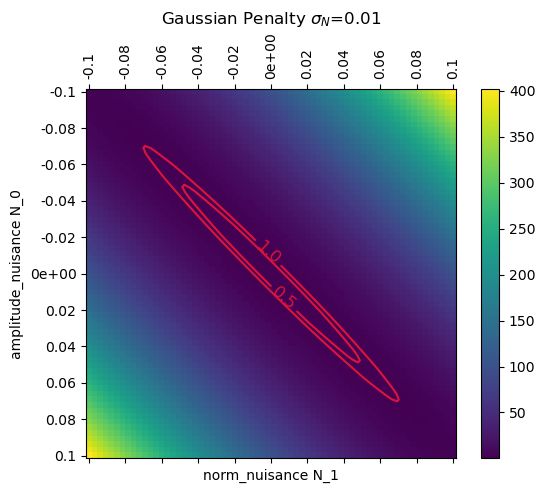

In [34]:
fig= plot_penalty(pen)